In [95]:
import torch
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import time
import torch.nn.functional as F
import torch.optim as optim



In [85]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [86]:
train_data=train_data.drop(['station','From Date', 'To Date','PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF'],axis=1)
test_data=test_data.drop(['station','From Date', 'To Date','PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF'],axis=1)
train_data.head(2)
test_data.head(2)

,time,PM2.5,latitude,longitude
0,2022-01-01 00:30:00,242.00,28.498571,77.26484
1,2022-01-01 01:30:00,254.75,28.498571,77.26484


In [87]:
missing_values = train_data.isnull().sum()
#print(missing_values)
missing_percent = (train_data.isnull().sum() / len(train_data)) * 100
#print(missing_percent)
median_PM=train_data['PM2.5'].median()
train_data['PM2.5']= train_data['PM2.5'].fillna(median_PM)
train_data['time'] = pd.to_datetime(train_data['time'])
train_data['Year'] = train_data['time'].dt.year
train_data['Month'] = train_data['time'].dt.month
train_data['Day'] = train_data['time'].dt.day
train_data['Hour'] = train_data['time'].dt.hour
train_data['Minute'] = train_data['time'].dt.minute
train_data['Second'] = train_data['time'].dt.second
train_data=train_data.drop(['time'],axis=1)
train_data['total_hour']=train_data['Year']*365*24*60+train_data['Month']*30*24*60+train_data['Day']*24*60+train_data['Minute']
missing_percent = (test_data.isnull().sum() / len(test_data)) * 100
#print(missing_percent)
median_PM= test_data['PM2.5'].median()
test_data['PM2.5']= test_data['PM2.5'].fillna(median_PM)
test_data['time'] = pd.to_datetime(test_data['time'])
test_data['Year'] = test_data['time'].dt.year
test_data['Month'] = test_data['time'].dt.month
test_data['Day'] = test_data['time'].dt.day
test_data['Hour'] = test_data['time'].dt.hour
test_data['Minute'] = test_data['time'].dt.minute
test_data['Second'] = test_data['time'].dt.second
test_data=test_data.drop(['time'],axis=1)
test_data['total_hour']=test_data['Year']*365*24*60+test_data['Month']*24*60+test_data['Day']*24*60+test_data['Minute']
train_data.head(2)
test_data.head(2)

,PM2.5,latitude,longitude,Year,Month,Day,Hour,Minute,Second,total_hour
0,242.00,28.498571,77.26484,2022,1,1,0,30,0,1062766110
1,254.75,28.498571,77.26484,2022,1,1,1,30,0,1062766110


In [88]:
X_train = train_data.drop(['PM2.5','total_hour'],axis=1)
y_train = train_data['PM2.5']
X_test = test_data.drop(['PM2.5','total_hour'],axis=1)
y_test = test_data['PM2.5']

/home/rishabh/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([13392])) that is different to the input size (torch.Size([13392, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/rishabh/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([4464])) that is different to the input size (torch.Size([4464, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100], Loss: 210.7969
Epoch [1/100], val Loss: 195.9902
Epoch [11/100], Loss: 132.5598
Epoch [11/100], val Loss: 114.1562
Epoch [21/100], Loss: 101.9387
Epoch [21/100], val Loss: 92.9719
Epoch [31/100], Loss: 102.3256
Epoch [31/100], val Loss: 90.6870
Epoch [41/100], Loss: 101.3067
Epoch [41/100], val Loss: 89.4862
Epoch [51/100], Loss: 100.4531
Epoch [51/100], val Loss: 88.8251
Epoch [61/100], Loss: 100.5710
Epoch [61/100], val Loss: 89.2178
Epoch [71/100], Loss: 100.4189
Epoch [71/100], val Loss: 88.8103
Epoch [81/100], Loss: 100.4017
Epoch [81/100], val Loss: 88.8519
Epoch [91/100], Loss: 100.4059
Epoch [91/100], val Loss: 88.9094
Test loss: 88.84392547607422


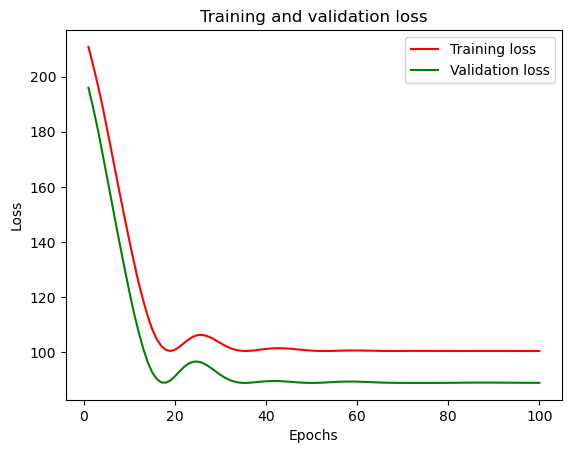

In [92]:

class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss,self).__init__()

    def forward(self,yhat,y):
        ls = nn.MSELoss()
        loss = torch.sqrt(ls(yhat, y))
        return loss

train_df = train_data
test_df = test_data

X_train = torch.tensor(train_data.drop(['PM2.5','total_hour'],axis=1).values).float()
y_train = torch.tensor(train_data['PM2.5'].values).float()
X_test = torch.tensor(test_data.drop(['PM2.5','total_hour'],axis=1).values).float()
y_test = torch.tensor(test_data['PM2.5'].values).float()

#model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = Net()
opti = optim.Adam(model.parameters())
lsfun = RMSELoss()

# Train model
start_time = time.time()
train_losses, val_losses = [], []
for epoch in range(100):
    opti.zero_grad()
    outputs = model(X_train)
    loss = lsfun(outputs, y_train)
    loss.backward()
    opti.step()
    train_losses.append(loss.item())
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = lsfun(val_outputs, y_test)
        val_losses.append(val_loss.item())
    if epoch % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))
        print('Epoch [{}/{}], val Loss: {:.4f}'.format(epoch+1, 100, val_loss.item()))
        
   
training_time_1 = time.time() - start_time
# Test model
start_time = time.time()
test_outputs = model(X_test)
test_loss = lsfun(test_outputs, y_test)
testing_time_1 = time.time() - start_time
print('Test loss:', test_loss.item())
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, 'red', label='Training loss')
plt.plot(epochs, val_losses, 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


8
